# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [11]:
import pandas as pd
from IPython.display import display

# Assuming 'cleaned_data' is your DataFrame
sample_data = cleaned_data.head()  # Using the first few rows for demonstration

# To display the DataFrame
print("Cleaned DataFrame:")
display(sample_data)

Cleaned DataFrame:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of unique mice
unique_mice_count = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 249


In [4]:
# Finding duplicate mice based on 'Mouse ID' and 'Timepoint'
duplicate_mouse_data = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]

# Display the duplicate mice by ID number
duplicate_mouse_ids = duplicate_mouse_data['Mouse ID'].unique()
print(f"Duplicate mice based on 'Mouse ID' and 'Timepoint': {duplicate_mouse_ids}")

Duplicate mice based on 'Mouse ID' and 'Timepoint': ['g989']


In [12]:
from IPython.display import display

# Get all the data for the duplicate mouse ID(s)
all_data_for_duplicate_mice = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

# To display the DataFrame
print("All data for duplicate mouse ID(s):")
display(all_data_for_duplicate_mice)

All data for duplicate mouse ID(s):


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
from IPython.display import display

# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

# To display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
display(cleaned_data.head())

Cleaned DataFrame:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of unique mice in the cleaned DataFrame
unique_mice_count_clean = cleaned_data['Mouse ID'].nunique()

print(f"Number of unique mice in the cleaned DataFrame: {unique_mice_count_clean}")

Number of unique mice in the cleaned DataFrame: 248


## Summary Statistics

In [15]:
# Group the data by drug regimen
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

# Display the summary statistics DataFrame
print("Summary Statistics Table:")
display(summary_stats)

Summary Statistics Table:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate the summary statistics using the aggregation method
summary_stats_advanced = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Rename the columns for better readability
summary_stats_advanced.columns = [
    'Mean Tumor Volume',
    'Median Tumor Volume',
    'Tumor Volume Variance',
    'Tumor Volume Std. Dev.',
    'Tumor Volume SEM'
]

# Display the summary statistics DataFrame
print("Advanced Summary Statistics Table:")
display(summary_stats_advanced)

Advanced Summary Statistics Table:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

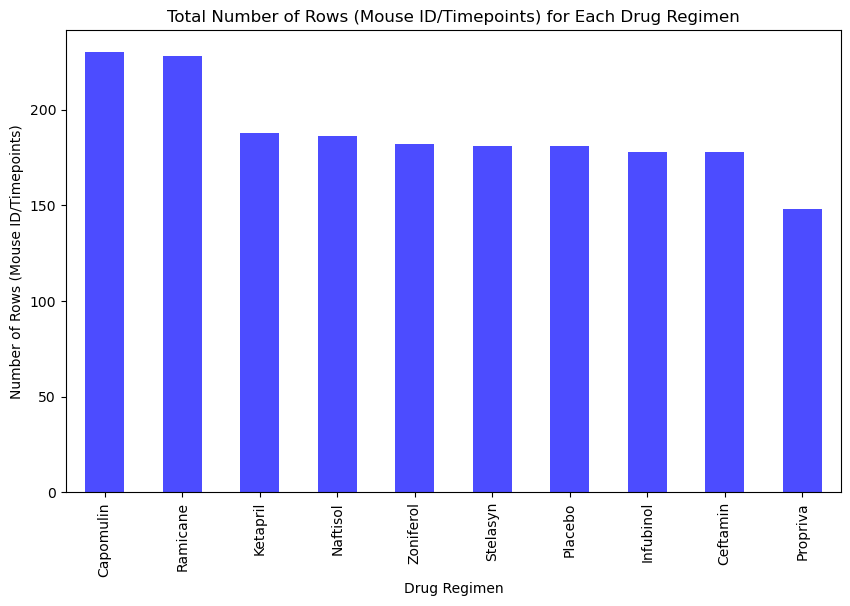

In [17]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='blue', alpha=0.7, figsize=(10, 6))

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')

# Show the plot
plt.show()

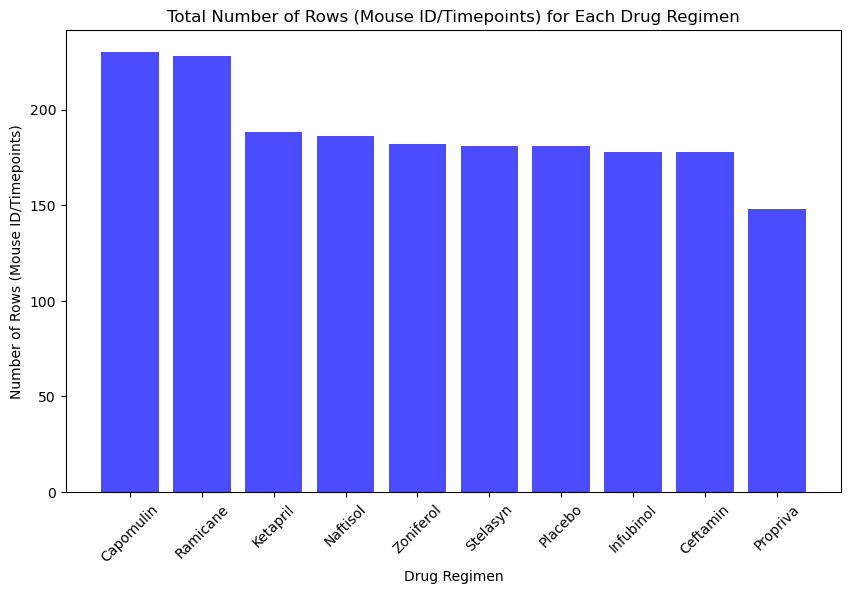

In [18]:
import matplotlib.pyplot as plt

# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Get the names of the drug regimens and the counts
drug_names = drug_regimen_counts.index.tolist()
counts = drug_regimen_counts.values.tolist()

# Generate a bar plot using Pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_names, counts, color='blue', alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

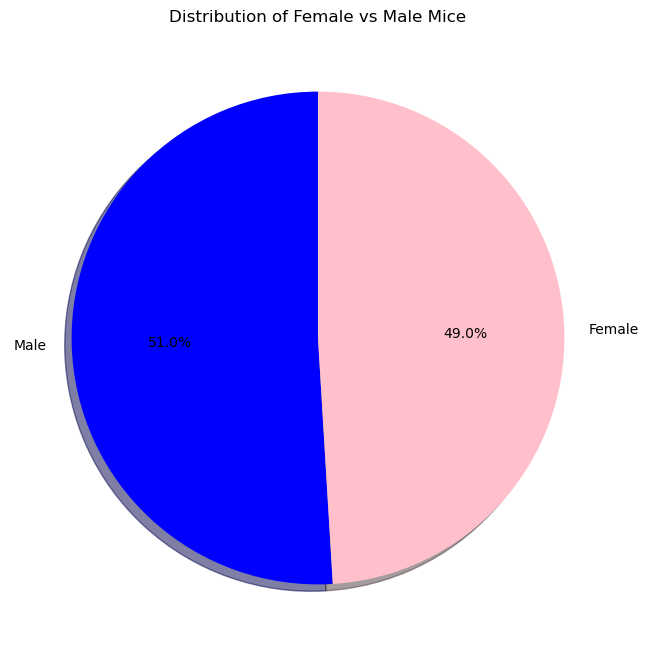

In [21]:
# Count the distribution of female versus male mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], shadow=True, figsize=(8, 8))

# Add title
plt.title('Distribution of Female vs Male Mice')

# Hide y-axis label
plt.ylabel('')

# Show the plot
plt.show()

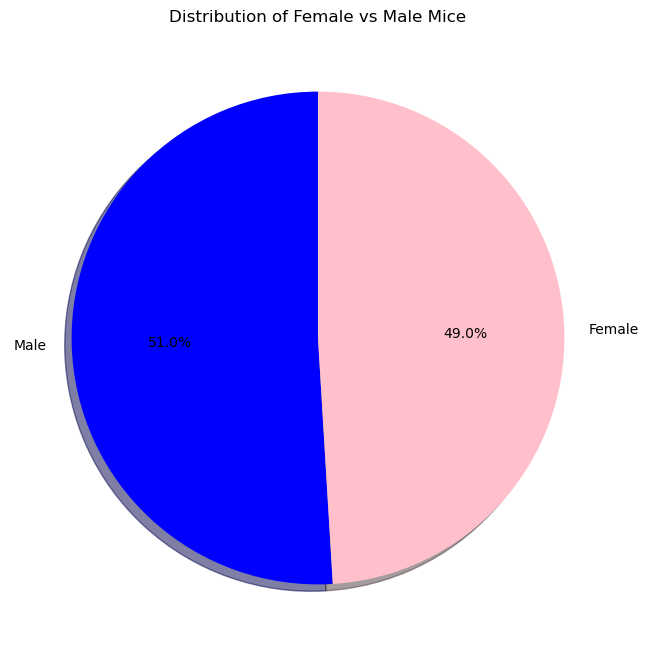

In [22]:
# Count the distribution of female versus male mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Get the labels and the counts
labels = gender_distribution.index.tolist()
counts = gender_distribution.values.tolist()

# Generate a pie plot using Pyplot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], shadow=True)

# Add title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# List of four drug regimens to focus on
target_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the original DataFrame to only include the four target drugs
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(target_drugs)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoint, cleaned_data, how='left', on=['Mouse ID', 'Timepoint'])

# Display the DataFrame containing final tumor volumes
print("Final Tumor Volume Data:")
display(final_tumor_volume_data.head())

Final Tumor Volume Data:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment in the list
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add the subset to the empty list for plotting later
    tumor_vol_data.append(subset)
    
    # Calculate the IQR for each treatment
    quartiles = subset.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"{treatment} IQR data is:")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    print(f"Outliers for {treatment} could be: {outliers.values}")
    print("\n")

Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Outliers for Capomulin could be: []


Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Outliers for Ramicane could be: []


Infubinol IQR data is:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Outliers for Infubinol could be: [36.3213458]


Ceftamin IQR data is:
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Outliers for Ceftamin could be: []




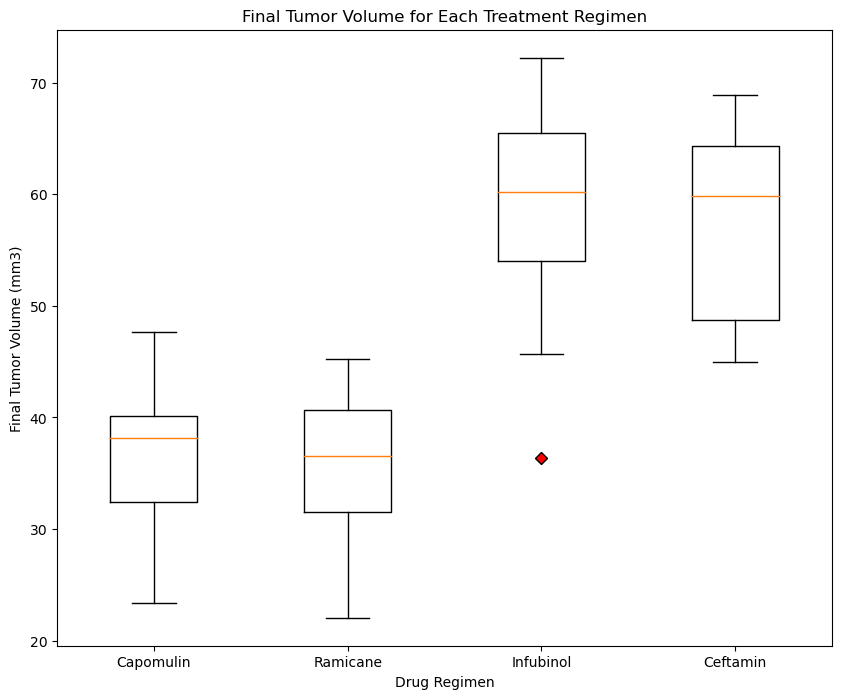

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10, 8))
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops={'markerfacecolor': 'r', 'marker': 'D'})

# Add title and labels
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

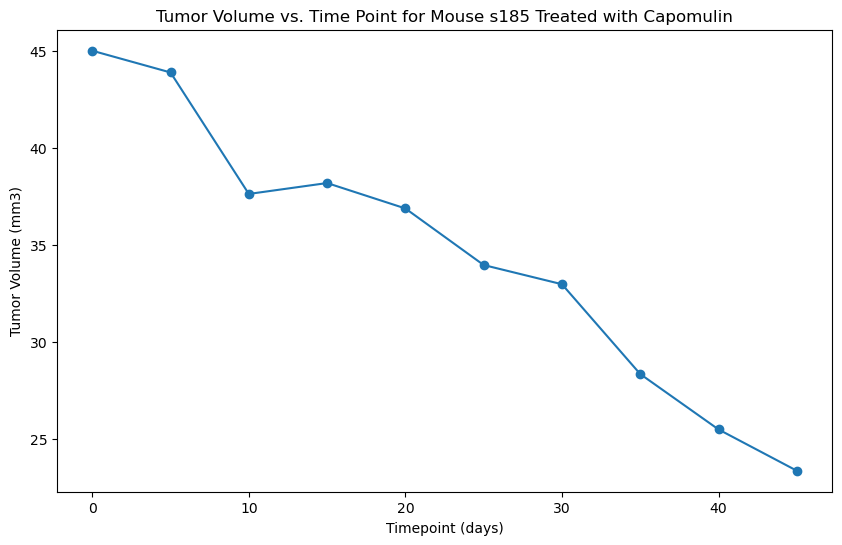

In [26]:
# Filter the data to include only a single mouse treated with Capomulin
# (Replace 'Mouse_ID' with the ID of the mouse you want to analyze)
mouse_id = 's185'  # Example mouse ID
single_mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Generate a line plot of tumor volume vs. time point for a single mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

# Add title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

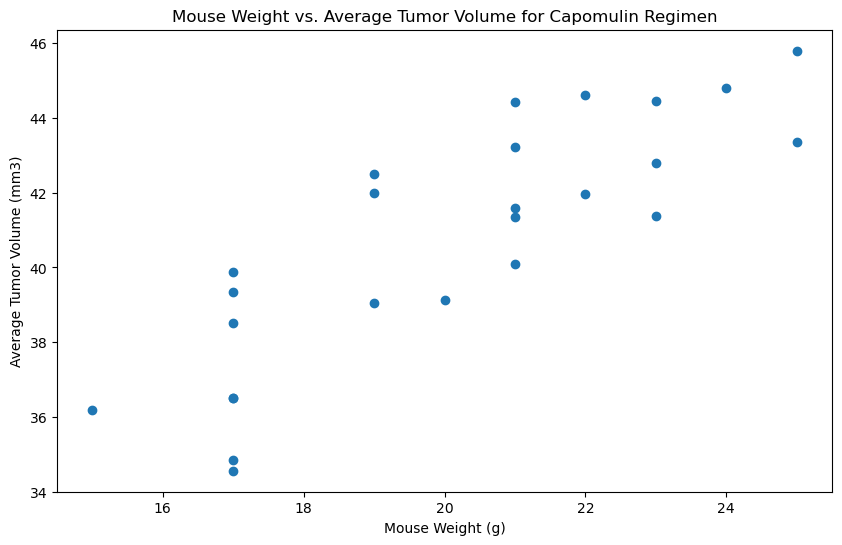

In [27]:
# Filter the data to include only mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'  # Just take the first weight value since it doesn't change for each mouse
}).reset_index()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker='o')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


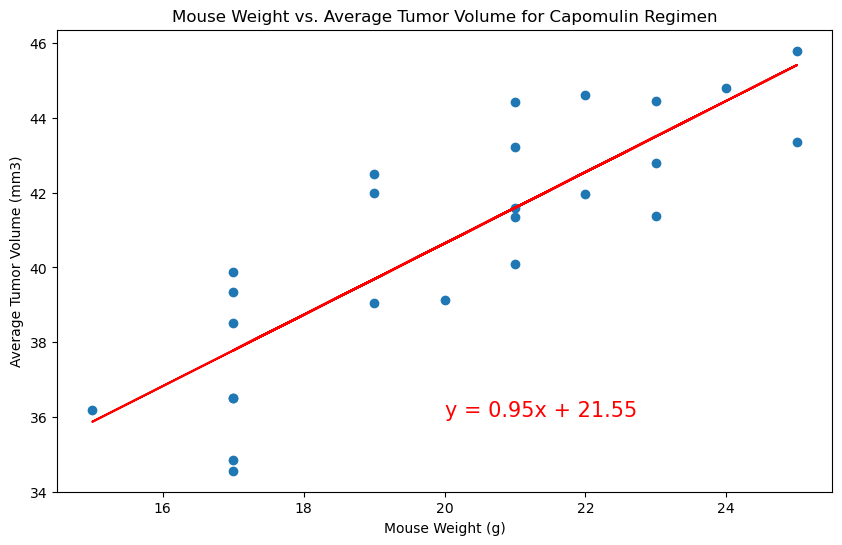

In [28]:
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
regress_values = avg_tumor_volume['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Generate a scatter plot with the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker='o')
plt.plot(avg_tumor_volume['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()